Nama : Faris Adnan Lugas

Peserta : FGA Digitalent

Program : Machine Learning

Submission : Natural Languange Processing

# Upload Dataset

In [7]:
#Upload File 
from google.colab import files
files.upload()

Saving archive.zip to archive.zip


{'archive.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\xdcx\xffP\x00\xcfq\xd5\xff\xff\xff\xff\xff\xff\xff\xff\x11\x00\x14\x00bbc-news-data.csv\x01\x00\x10\x00\xc4\x84M\x00\x00\x00\x00\x00\xb2\xee\x1c\x00\x00\x00\x00\x00\x94\xbd\xd9r\x1bI\x926z\xad\xf3\x14i4iXe\x07\x80q\xd5\xd2s1FQk\x95T\xd2/\xaaZ\xd3\x97\x01 \x00d1\x91\x89\xce\x85\x14\xeau\xfaM\xfa\xc9\x8e\x7f\x9f{,\t\xaa\xfa\xb7c6c]"\x80\xcc\x08\x0f\x0f_?w_\xb8\xde\xaf\x9bv\xffhUV\xbev[\xff\xa8/\xfb\xca?Z4u\xef\xeb\xfe\xff\x99\x0f]Y\xfb\xae{trr:\xeb\xbf\xf7\x8f\xae\x96E\xe7*\xdf\x15\xf3\xa6\xe9\xfa\xe2k\xb9\xf5\xc57\xd7\xd6\xbe-vm\xb3*\xfbG\xc5\xff\x19\\\xdb\xfb\xb6\xda\xdb_\xba\xc2\xf5\xc5\xef7\xc5\xd6/KW\xacKW\xeb\xef\xecg\x7f\x0c\xdb\x9d_\x16\xcf\x9e>)\xfa\xa6x|:;=\x9f\xd7\xc5O\xff\xfe\xd7\xd3\x93\x93\xed\xcf\xc5\xaai\x8b~\xe3\xe5\xff[\xef\x8b\xad\xack\xd3\xe1\x8b\xaf\xfc\xc2o\xe7\xbe\x9d\x14\xab\xb6\xd9\x16\x8f\x9f\x9e\xbf\xd8\x16{\xef\xda\xa9\xfc\x7fU\xfavV\x14_\xe5w\xab\xb2\xddN\x8a\xfbM\xb9\xd8\x14eW\xd4\xcd}\xd1\xd4\xbehV|\xea\xbc\

In [8]:
# unzip
!mkdir archive
!unzip archive.zip -d bbcnewsarchive
!ls bbcnewsarchive

Archive:  archive.zip
  inflating: bbcnewsarchive/bbc-news-data.csv  
BBCNews.csv  bbc-news-data.csv


# Load Dataset

In [3]:
# import pandas
import pandas as pd

In [12]:
# load dataset
df = pd.read_csv('bbcnewsarchive/bbc-news-data.csv', sep='\t')
df.head(10)

category  ...                                            content
0  business  ...   Quarterly profits at US media giant TimeWarne...
1  business  ...   The dollar has hit its highest level against ...
2  business  ...   The owners of embattled Russian oil giant Yuk...
3  business  ...   British Airways has blamed high fuel prices f...
4  business  ...   Shares in UK drinks and food firm Allied Dome...
5  business  ...   Japan's economy teetered on the brink of a te...
6  business  ...   The US created fewer jobs than expected in Ja...
7  business  ...   India, which attends the G7 meeting of seven ...
8  business  ...   Ethiopia produced 14.27 million tonnes of cro...
9  business  ...   A US government claim accusing the country's ...

[10 rows x 4 columns]

In [13]:
# data columns
df.columns

Index(['category', 'filename', 'title', 'content'], dtype='object')

In [14]:
# total data
df.shape

(2225, 4)

In [15]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


In [16]:
# Kategori
df.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [17]:
# Menghapus kolom yang tidak dibutuhkan
df_new = df.drop(columns=['filename'])
df_new

category  ...                                            content
0     business  ...   Quarterly profits at US media giant TimeWarne...
1     business  ...   The dollar has hit its highest level against ...
2     business  ...   The owners of embattled Russian oil giant Yuk...
3     business  ...   British Airways has blamed high fuel prices f...
4     business  ...   Shares in UK drinks and food firm Allied Dome...
...        ...  ...                                                ...
2220      tech  ...   BT is introducing two initiatives to help bea...
2221      tech  ...   Computer users across the world continue to i...
2222      tech  ...   A new European directive could put software w...
2223      tech  ...   The man making sure US computer networks are ...
2224      tech  ...   Online role playing games are time-consuming,...

[2225 rows x 3 columns]

# Melakukan data cleaning

In [23]:
# import dan download package
import nltk, os, re, string

from keras.layers import Input, LSTM, Bidirectional, SpatialDropout1D, Dropout, Flatten, Dense, Embedding, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download('wordnet')
nltk.download('stopwords') 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
# lower-case semua characters
df_new.title = df_new.title.apply(lambda x: x.lower())
df_new.content = df_new.content.apply(lambda x: x.lower())

# removing functuation
def cleaner(data):
    return(data.translate(str.maketrans('','', string.punctuation)))
    df_new.title = df_new.title.apply(lambda x: cleaner(x))
    df_new.content = df_new.content.apply(lambda x: lem(x))

## lematization
lemmatizer = WordNetLemmatizer()

def lem(data):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(data.split())]))
    df_new.title = df_new.title.apply(lambda x: lem(x))
    df_new.content = df_new.content.apply(lambda x: lem(x))

# removing number
def rem_numbers(data):
    return re.sub('[0-9]+','',data)
    df_new['title'].apply(rem_numbers)
    df_new['content'].apply(rem_numbers)

# removing stopword
st_words = stopwords.words()
def stopword(data):
    return(' '.join([w for w in data.split() if w not in st_words ]))
    df_new.title = df_new.title.apply(lambda x: stopword(x))
    df_new.content = df_new.content.apply(lambda x: lem(x))

In [25]:
# Lihat data sesudah cleaning
df_new.head(10)

category  ...                                            content
0  business  ...   quarterly profits at us media giant timewarne...
1  business  ...   the dollar has hit its highest level against ...
2  business  ...   the owners of embattled russian oil giant yuk...
3  business  ...   british airways has blamed high fuel prices f...
4  business  ...   shares in uk drinks and food firm allied dome...
5  business  ...   japan's economy teetered on the brink of a te...
6  business  ...   the us created fewer jobs than expected in ja...
7  business  ...   india, which attends the g7 meeting of seven ...
8  business  ...   ethiopia produced 14.27 million tonnes of cro...
9  business  ...   a us government claim accusing the country's ...

[10 rows x 3 columns]

# Membuat Model dan Plot

In [26]:
# data category one-hot-encoding
category = pd.get_dummies(df_new.category)
df_new_cat = pd.concat([df_new, category], axis=1)
df_new_cat = df_new_cat.drop(columns='category')
df_new_cat.head(10)

title  ... tech
0  ad sales boost time warner profit  ...    0
1   dollar gains on greenspan speech  ...    0
2  yukos unit buyer faces loan claim  ...    0
3  high fuel prices hit ba's profits  ...    0
4  pernod takeover talk lifts domecq  ...    0
5   japan narrowly escapes recession  ...    0
6   jobs growth still slow in the us  ...    0
7   india calls for fair trade rules  ...    0
8  ethiopia's crop production up 24%  ...    0
9  court rejects $280bn tobacco case  ...    0

[10 rows x 7 columns]

In [27]:
# merubah dataframe value ke numpy array
news = df_new_cat['title'].values + '' + df_new_cat['content'].values
label = df_new_cat[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [28]:
# lihat news array
news

array(['ad sales boost time warner profit quarterly profits at us media giant timewarner jumped 76% to $1.13bn (£600m) for the three months to december, from $639m year-earlier.  the firm, which is now one of the biggest investors in google, benefited from sales of high-speed internet connections and higher advert sales. timewarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. its profits were buoyed by one-off gains which offset a profit dip at warner bros, and less users for aol.  time warner said on friday that it now owns 8% of search-engine google. but its own internet business, aol, had has mixed fortunes. it lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. however, the company said aol\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sig

In [29]:
# Split data into training dan validation
from sklearn.model_selection import train_test_split
news_train, news_test, label_train, label_test = train_test_split(news, label, test_size=0.2, shuffle=True)

In [30]:
# tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(news_train) 
tokenizer.fit_on_texts(news_test)
 
sekuens_train = tokenizer.texts_to_sequences(news_train)
sekuens_test = tokenizer.texts_to_sequences(news_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

In [31]:
# model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 435,973
Trainable params: 435,973
Non-trainable params: 0
_________________________________________________________________


In [32]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 90%!")
callbacks = myCallback()

In [33]:
# model fit
history = model.fit(padded_train, label_train, epochs=50, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks], validation_steps=30)

Epoch 1/50
56/56 - 343s - loss: 1.6003 - accuracy: 0.2478 - val_loss: 1.5415 - val_accuracy: 0.3955
Epoch 2/50
56/56 - 337s - loss: 1.3731 - accuracy: 0.4112 - val_loss: 1.1117 - val_accuracy: 0.5034
Epoch 3/50
56/56 - 338s - loss: 0.7816 - accuracy: 0.6758 - val_loss: 1.0662 - val_accuracy: 0.6247
Epoch 4/50
56/56 - 337s - loss: 0.5888 - accuracy: 0.7635 - val_loss: 0.5455 - val_accuracy: 0.8090
Epoch 5/50
56/56 - 335s - loss: 0.2205 - accuracy: 0.9287 - val_loss: 0.5568 - val_accuracy: 0.8629
Epoch 6/50
56/56 - 335s - loss: 0.0837 - accuracy: 0.9736 - val_loss: 0.5552 - val_accuracy: 0.8584
Epoch 7/50
56/56 - 358s - loss: 0.0506 - accuracy: 0.9843 - val_loss: 0.5381 - val_accuracy: 0.8742
Epoch 8/50
56/56 - 362s - loss: 0.1616 - accuracy: 0.9573 - val_loss: 0.8704 - val_accuracy: 0.7461
Epoch 9/50
56/56 - 361s - loss: 0.0627 - accuracy: 0.9860 - val_loss: 0.7011 - val_accuracy: 0.8360
Epoch 10/50
56/56 - 346s - loss: 0.0188 - accuracy: 0.9972 - val_loss: 0.6644 - val_accuracy: 0.8719

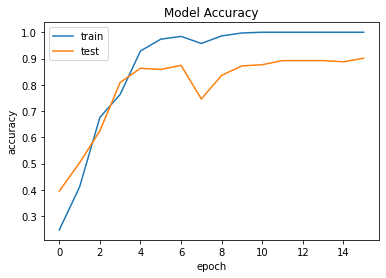

In [34]:
# plot dari accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

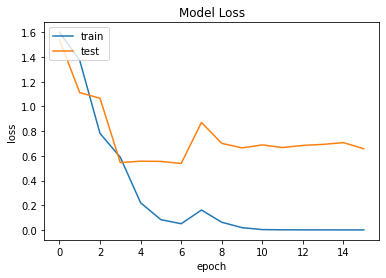

In [35]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()